Running benchmarks without MKL...
Done.

Running benchmarks with MKL...


/opt/anaconda3/lib/python3.11/importlib/__init__.py:169: UserWarning: The NumPy module was reloaded (imported a second time). This can in some cases result in small but subtle issues and is discouraged.
  _bootstrap._exec(spec, module)


Done.



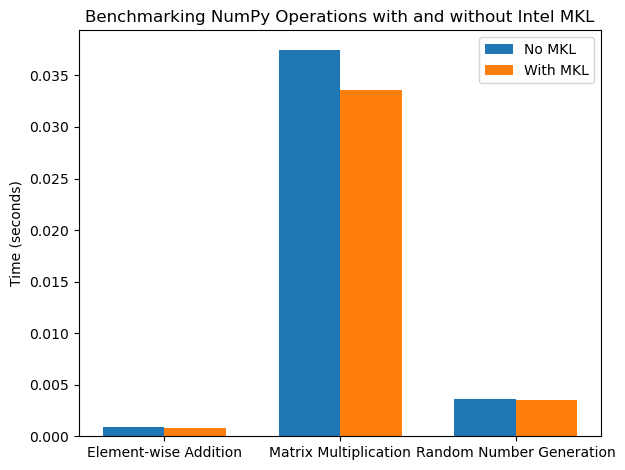

Element-wise Addition: No MKL = 0.000866 s, With MKL = 0.000819 s, Improvement = 5.44%
Matrix Multiplication: No MKL = 0.037495 s, With MKL = 0.033599 s, Improvement = 10.39%
Random Number Generation: No MKL = 0.003606 s, With MKL = 0.003550 s, Improvement = 1.54%


In [4]:
import numpy as np
import timeit
import matplotlib.pyplot as plt
import importlib

def benchmark_operation(operation, setup, num_runs=100):
    times = timeit.repeat(operation, setup=setup, repeat=num_runs, number=1)
    return np.mean(times), np.std(times)


setup_code = """
import numpy as np
np.random.seed(42)
"""


operations = {
    "Element-wise Addition": "a + b",
    "Matrix Multiplication": "np.dot(a, b)",
    "Random Number Generation": "np.random.rand(1000, 1000)"
}


setup_code_with_arrays = setup_code + """
a = np.random.rand(1000, 1000)
b = np.random.rand(1000, 1000)
"""

def run_benchmarks():
    results = {}
    for name, operation in operations.items():
        setup = setup_code_with_arrays if "a" in operation else setup_code
        mean_time, std_time = benchmark_operation(operation, setup)
        results[name] = (mean_time, std_time)
    return results


print("Running benchmarks without MKL...")
results_no_mkl = run_benchmarks()
print("Done.\n")

importlib.reload(np)

print("Running benchmarks with MKL...")
results_with_mkl = run_benchmarks()
print("Done.\n")


operations_list = list(results_no_mkl.keys())

no_mkl_means = [results_no_mkl[op][0] for op in operations_list]
with_mkl_means = [results_with_mkl[op][0] for op in operations_list]

x = np.arange(len(operations_list))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, no_mkl_means, width, label='No MKL')
rects2 = ax.bar(x + width/2, with_mkl_means, width, label='With MKL')

ax.set_ylabel('Time (seconds)')
ax.set_title('Benchmarking NumPy Operations with and without Intel MKL')
ax.set_xticks(x)
ax.set_xticklabels(operations_list)
ax.legend()

fig.tight_layout()
plt.show()

for name in operations_list:
    no_mkl_time = results_no_mkl[name][0]
    with_mkl_time = results_with_mkl[name][0]
    improvement = ((no_mkl_time - with_mkl_time) / no_mkl_time) * 100
    print(f"{name}: No MKL = {no_mkl_time:.6f} s, With MKL = {with_mkl_time:.6f} s, Improvement = {improvement:.2f}%")
